<a href="https://colab.research.google.com/github/AyushCodez/SpeechEmotion/blob/main/text_generation/classifier/emotion_classifier_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
from transformers import pipeline
#from utils import emotion_classifier, emotion_classifier2, EmoAccuracyrequired

EmoAccuracyrequired = 0.2


emotion_classifier2 = "michellejieli/emotion_text_classifier"

def getclassifier():
    classifier = pipeline("text-classification", model = emotion_classifier2, return_all_scores=True)
    return classifier

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    classifier = getclassifier()

In [ ]:

#implementing two ways to run the classifier model

# 1) check the emotion/tone of the paragraph as a whole
def check_possible_emotions_aswhole(text):
    result = classifier(text)[0]
    possible_emotions = {}
    for emotion in result:
        if(emotion['score']>EmoAccuracyrequired):
            possible_emotions[emotion['label']] = emotion['score']
    return possible_emotions


# 2) check the emotions/tone of the para line by line
def check_possible_emotions_linebyline(text):
    emo = {'fear':0.0, 'anger':0.0, 'joy':0.0, 'sadness':0.0, 'surprise':0.0, 'neutral':0.0, 'disgust':0.0}
    lines = text.split(".")
    for line in lines:
        result = classifier(line)[0]
        for emotion in result:
            emo[emotion['label']] += emotion['score']
    n = len(lines)
    possible_emo = {}
    for label in emo:
        emo[label] = emo[label]/n
        if(emo[label]>EmoAccuracyrequired):
            possible_emo[label] = emo[label]
    return possible_emo

In [ ]:
#imports to plot a confusion matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, plotname, figsize=(5, 5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'By LLM'
    cm.columns.name = 'Predicted by classifier'
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(plotname)
    sns.heatmap(cm, cmap="YlGnBu", annot=annot, fmt='', ax=ax, vmax=30)


1   neutral  --->  {'fear': 0.3160477876663208, 'neutral': 0.6414541006088257}
2   joy  --->  {'joy': 0.630416214466095, 'neutral': 0.3489663004875183}
3   sadness  --->  {'fear': 0.43066805601119995, 'neutral': 0.4663276672363281}
4   anger  --->  {'neutral': 0.8815032839775085}
5   fear  --->  {'neutral': 0.7628644108772278}
6   surprise  --->  {'neutral': 0.9217501282691956}
7   disgust  --->  {'neutral': 0.3251417577266693, 'sadness': 0.6444977521896362}
8   neutral  --->  {'joy': 0.6734927892684937, 'neutral': 0.2901138663291931}
9   joy  --->  {'joy': 0.8838436007499695}
10   sadness  --->  {'neutral': 0.8288806080818176}
11   anger  --->  {'anger': 0.7312036156654358, 'neutral': 0.21980902552604675}
12   fear  --->  {'neutral': 0.9434012770652771}
13   surprise  --->  {'neutral': 0.8069239854812622}
14   disgust  --->  {'disgust': 0.9186446070671082}
15   neutral  --->  {'fear': 0.31060805916786194, 'joy': 0.44639018177986145, 'neutral': 0.20888113975524902}
16   neutral  --->  

<ipython-input-29-1a2e4f2baa31>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


0.5928853754940712

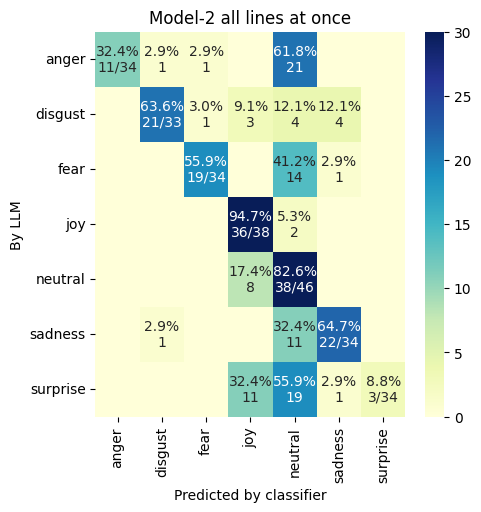

In [ ]:
# 1) Way-1 to do things

sentences = open("/content/responses.txt", "r").read()
sentences = sentences.split("\n\n")

#print(sentences)

y_true = []
y_pred = []
c=1;

for sentence in sentences:
    emotion = sentence.split("]")[0][1:]
    line = sentence.split("]")[1]
    possible_emo = check_possible_emotions_aswhole(line)
    emotion = emotion.lower()
    if(emotion=='sad'):
      emotion='sadness'
    #print(emotion, " --> ", possible_emo)
    y_true.append(emotion)
    if emotion in possible_emo:
        y_pred.append(emotion)
    else:
        y_pred.append(max(possible_emo, key=possible_emo.get))
    print(c, " ", emotion, " ---> ", possible_emo)
    c+=1
plot_cm(y_true, y_pred, "Model-2 all lines at once")

cnt = 0
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        cnt += 1
Accuracy = cnt / len(y_true)
Accuracy

neutral  --->  {'fear': 0.2838608744787052, 'neutral': 0.6931039094924927}
joy  --->  {'joy': 0.31061611980355036, 'neutral': 0.6674870004256567}
sadness  --->  {'neutral': 0.7875646551450094}
anger  --->  {'neutral': 0.8153822620709738}
fear  --->  {'neutral': 0.8343649506568909}
surprise  --->  {'neutral': 0.7838689386844635}
disgust  --->  {'sadness': 0.2617288444501658, 'neutral': 0.6640377144018809}
neutral  --->  {'joy': 0.3087942616160338, 'neutral': 0.6507106820742289}
joy  --->  {'joy': 0.3701984500900532, 'neutral': 0.6181182588140169}
sadness  --->  {'neutral': 0.8852735956509908}
anger  --->  {'anger': 0.30160543772702414, 'neutral': 0.6513405032455921}
fear  --->  {'neutral': 0.9623895486195883}
surprise  --->  {'neutral': 0.8434002002080282}
disgust  --->  {'neutral': 0.6359955078611771, 'disgust': 0.3283793938656648}
neutral  --->  {'fear': 0.3289111442863941, 'neutral': 0.5097654387354851}
neutral  --->  {'joy': 0.4208563143038191, 'neutral': 0.563179075717926}
joy  ---

<ipython-input-29-1a2e4f2baa31>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


0.5849802371541502

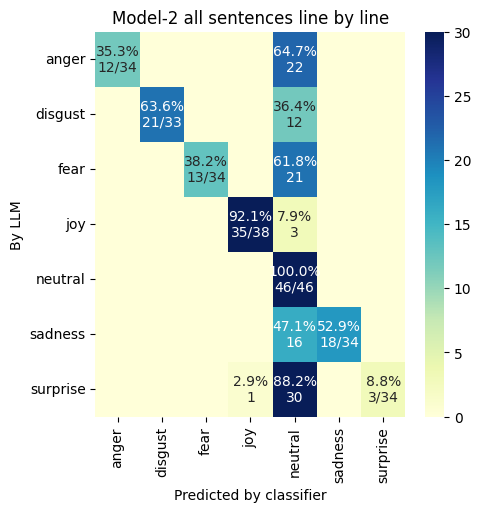

In [ ]:
# 2) Way-2 to do things

sentences = open("/content/responses.txt", "r").read()
sentences = sentences.split("\n\n")

#print(sentences)

y_true = []
y_pred = []

for sentence in sentences:
    emotion = sentence.split("]")[0][1:]
    line = sentence.split("]")[1]
    possible_emo = check_possible_emotions_linebyline(line)
    emotion = emotion.lower()
    if(emotion=='sad'):
      emotion='sadness'
    #print(emotion, " --> ", possible_emo)
    y_true.append(emotion)
    if emotion in possible_emo:
        y_pred.append(emotion)
    else:
        y_pred.append(max(possible_emo, key=possible_emo.get))
    print(emotion, " ---> ", possible_emo)

print(y_true)
print(y_pred)
print(y_true.count('neutral'))
plot_cm(y_true, y_pred, "Model-2 all sentences line by line")

cnt = 0
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        cnt += 1
Accuracy = cnt / len(y_true)
Accuracy